# Exercise 8 Solution

**"classdata/Airline-Tweet-Sentiment.csv"** collects the tweets that mention one of the six major airlines in the US. The goal here is to analyze the differences in the relative term frequencies when people tweet about these airlines.

The following code reads the data file into a data frame **df** and does some cleaning.

In [1]:
import pandas as pd
df = pd.read_csv('classdata/Airline-Tweet-Sentiment.csv',encoding='latin-1')
df["text"]=df["text"].str.replace('@\S+',' ',regex=True)
df["text"]=df["text"].str.replace('http\S+',' ',regex=True)
display(df[["tweet_created","airline","text"]].head())
print(df.airline.value_counts())

,tweet_created,airline,text
0,2015-02-24 11:35:52,Virgin America,What said.
1,2015-02-24 11:15:59,Virgin America,plus you've added commercials to the experie...
2,2015-02-24 11:15:48,Virgin America,I didn't today... Must mean I need to take a...
3,2015-02-24 11:15:36,Virgin America,"it's really aggressive to blast obnoxious ""e..."
4,2015-02-24 11:14:45,Virgin America,and it's a really big bad thing about it


United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


## Part 1: Bar Chart

1. Choose any three airlines you are interested in. Create the DTM for the tweets about each of the three airlines separately. Your DTMs must satisfy the following requirements:

   - Use the default tokenizer from sklearn library. 
   - Remove stop words in the list of nltk. 
   - Don't stem tokens.
   - Create DTM with TF scores.
   - Use only bigrams in vocabulary.

Save the three DTMs as **DTM1**, **DTM2** and **DTM3**. Calculuate the total frequency of each unique term in each DTM. Save your output as three two-column data frames called **dffreq1**, **dffreq2**, and **dffreq3**, in which the terms are given in column "Term" and their total frequencies are given in column "Frequency". Sort each of them by the total frequencies in a descending order and reset the row index. 

In [2]:
#You answer here:
from sklearn.feature_extraction.text import CountVectorizer
import nltk  
nltk_stopwords = nltk.corpus.stopwords.words("english") 
vectorizer = CountVectorizer(stop_words=nltk_stopwords,ngram_range=(2,2))
DTM1 = vectorizer.fit_transform(df[df.airline=="United"]["text"])
dffreq1 = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM1.sum(axis=0).tolist()[0]
                  })
dffreq1.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq1.reset_index(inplace=True,drop=True)

DTM2 = vectorizer.fit_transform(df[df.airline=="US Airways"]["text"])
dffreq2 = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM2.sum(axis=0).tolist()[0]
                  })
dffreq2.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq2.reset_index(inplace=True,drop=True)

DTM3 = vectorizer.fit_transform(df[df.airline=="American"]["text"])
dffreq3 = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM3.sum(axis=0).tolist()[0]
                  })
dffreq3.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq3.reset_index(inplace=True,drop=True)


#Check your answer
display(dffreq1.head())
display(dffreq2.head())
display(dffreq3.head())

,Term,Frequency
0,customer service,156
1,cancelled flightled,91
2,late flight,90
3,late flightr,43
4,booking problems,43


,Term,Frequency
0,customer service,149
1,cancelled flightled,111
2,late flightr,55
3,late flight,54
4,flight cancelled,47


,Term,Frequency
0,cancelled flightled,164
1,customer service,110
2,cancelled flighted,68
3,flight cancelled,64
4,call back,55


2. Merge **dffreq1**, **dffreq2**, and **dffreq3** into one data frame based on the terms they have in common in column **Term**. Save the merged data frame as **dfall**. Normalize **'Frequency_x'** by dividing each frequency by the column sum of 'Frequency_x'. Similarly, normalize **'Frequency_y'** and **'Frequency'** in the same way. Sort **dfall** by 'Frequency_x' in a descending order and reset the row index. Print the first five rows of **dfall**.

*Hint: You can merge dffreq1 and dffreq2 to dfall first and then merge dfall with dffreq3.*

In [6]:
#Your answer here:
dftemp = pd.merge(dffreq1, dffreq2, on="Term")
dfall = pd.merge(dftemp, dffreq3, on="Term")

dfall['Frequency_x']=dfall['Frequency_x']/dfall['Frequency_x'].sum()
dfall['Frequency_y']=dfall['Frequency_y']/dfall['Frequency_y'].sum()
dfall['Frequency']=dfall['Frequency']/dfall['Frequency'].sum()
dfall.sort_values(by="Frequency_x",ascending=False,inplace=True)
dfall.reset_index(drop=True,inplace=True)
dfall.head()

#Check your answer:
dfall.head()

,Term,Frequency_x,Frequency_y,Frequency
0,customer service,0.039867,0.039077,0.031483
1,cancelled flightled,0.023256,0.029111,0.046938
2,late flight,0.023000,0.014162,0.012021
3,booking problems,0.010989,0.007606,0.008014
4,late flightr,0.010989,0.014424,0.008300


3. Create a bar chart to compare the normalized term frequencies in the tweets about the three airlines you chose. You only need to plot the top 20 bigrams in **dfall** from question 2, which should have been sorted by **Frequency_x**. You can create the bar chart in any style you like but, in the legend, you need to label the bars with the irlines' names, and the bars must be positioned along the X-axis without any overlap.

*Hint: Modify the x-coordiantes of the bars for different airlines (plus something, minus something or simply do nothing).*

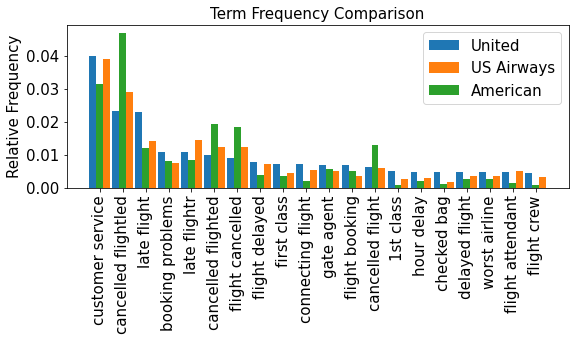

In [13]:
#You answer here:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
top = 20
x = np.arange(top)  # the x ticks (terms) locations
width = 0.3         # the width of the bars

plt.rcParams['figure.figsize'] = [9, 3] #This sets the size of the plot.
fig, ax = plt.subplots()
ax.bar(x - width, dfall.Frequency_x[0:top], width, label='United')
ax.bar(x + width, dfall.Frequency_y[0:top], width, label='US Airways')
ax.bar(x, dfall.Frequency[0:top], width, label='American')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Frequency')
ax.set_title('Term Frequency Comparison')
ax.set_xticks(x)
ax.set_xticklabels(dfall.Term[0:top])
ax.legend()
plt.xticks(rotation=90)
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)   # fontsize of the figure title
plt.show()

#Check your answer:
plt.show() 

## Part 2: Text Network

4. Suppose you want to visiualize the connections between terms and the six airlines. Create a **corpus** object directly from  the csv file "classdata/Airline-Tweet-Sentiment.csv". Print **corpus.tokenized()**.

*Hint: How to set **doc_col** and **label_col** in function Corpus.from_csv? Which column is the text data? Which column is the group label?* 

In [16]:
#Your answer here (it may take one or two minutes to run because of the big size of data):
from textnets import Corpus, Textnet
corpus = Corpus.from_csv("classdata/Airline-Tweet-Sentiment.csv", 
                         doc_col='text',
                         label_col='airline')

#Check your answer
corpus.tokenized()

,term,n,term_weight
label,,,
American,"""really",1,0.778151
American,#mia,1,0.778151
American,#shafte,1,0.778151
American,$,63,0.000000
Delta,$,54,0.000000
...,...,...,...
Virgin America,ð@virginamerica,1,0.778151
Virgin America,ðð,1,0.778151
Virgin America,ðððð,1,0.778151


5.  Create a two-mode text network from **corpus** created in question 4 based on the following requirements.

   - Only visualize the terms that 
         *  have a frequency (in column "n") of at least 20 
         *  have a positive weight (in column "term_weight")
   - Set color_clusters to False.
   - Set label_term_nodes, label_doc_nodes, and show_clusters to True.
   
You can set other parameters in anyway you like as long as the plot is shown in an appropriate size. 

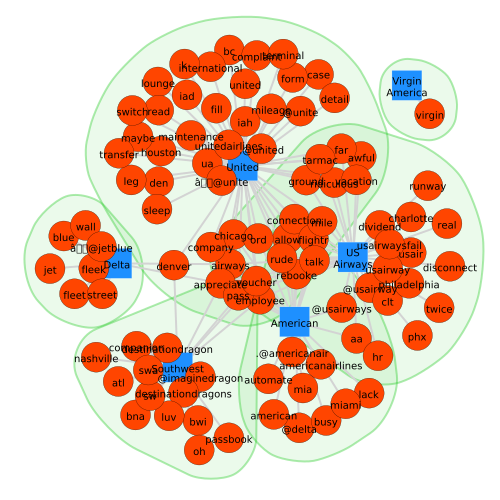

In [18]:
#Your answer here
import random
random.seed(2021)
tn = Textnet(corpus.tokenized()[(corpus.tokenized().n>=20) & (corpus.tokenized().term_weight>0)], min_docs=1)
tn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        color_clusters=False,
        show_clusters=True, 
        vertex_size=30,
        vertex_label_size=10,
        bbox=[500,500])


6.  Create a one-mode text network from the network you created in question 5 by projecting it to the document (group) nodes. The remaining requirements are the same as in question 6 except that, this time, you need to use different colors to represent the clusters instead of using  shaded regions. 

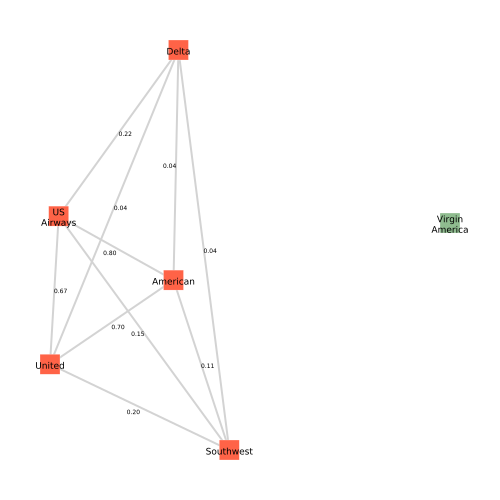

In [19]:
#Your answer here
random.seed(2021)
papers = tn.project(node_type='doc')
papers.plot(label_nodes=True,   #Show or hide the node's label
            label_edges=True,   #Show or hide the edge weight
            show_clusters=False,
            color_clusters=True,
            bbox=[500,500])


## Part 3: Word Cloud

7. The following code loads  "classdata/Apple-Twitter-Sentiment-DFE.csv" into a data frame **df2**. This file contains the tweets that mentioned **@Apple** or **#AAPL**. All urls in the tweets are removed using regular expressions.

    Create a word cloud for column "df2["text"]" using the picture "classdata/pngwing.com.png" in IDAS as the "mask". You can choose any colormap, font size, figure size, and style for your word cloud. 

In [22]:
import pandas as pd
import re
df2 = pd.read_csv("classdata/Apple-Twitter-Sentiment-DFE.csv",encoding='latin-1')
df2.text=[re.sub("http\S+", "", s) for s in df2.text]
df2.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.395020e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.395050e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.395070e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.395160e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/2014 12:14:24,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.395170e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


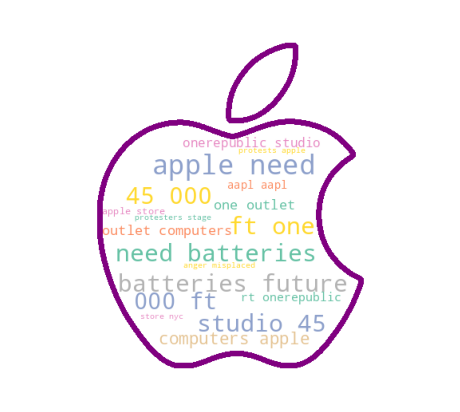

In [26]:
#Your answer here:
from wordcloud import WordCloud 
from PIL import Image
DTM =vectorizer.fit_transform(df2["text"])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dictfreq = dict(zip(dffreq.Term,dffreq.Frequency))
mask = np.array(Image.open("classdata/pngwing.com.png")) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                prefer_horizontal=0.9,  #How often a term is put horizontally. 
                colormap='Set2',   
                mask=mask,
                contour_width=10,
                contour_color='purple',  
                min_font_size = 10,
                random_state = 2021)
wordcloud.generate_from_frequencies(frequencies=dictfreq) 
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

#Check your answer:
plt.show() 